In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic-training-data.csv")

# Data Exploration

In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

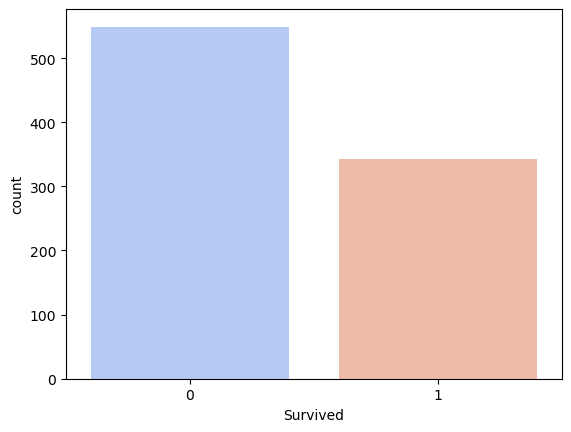

In [7]:
sns.countplot(x="Survived",data=df,palette="coolwarm")

In [8]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

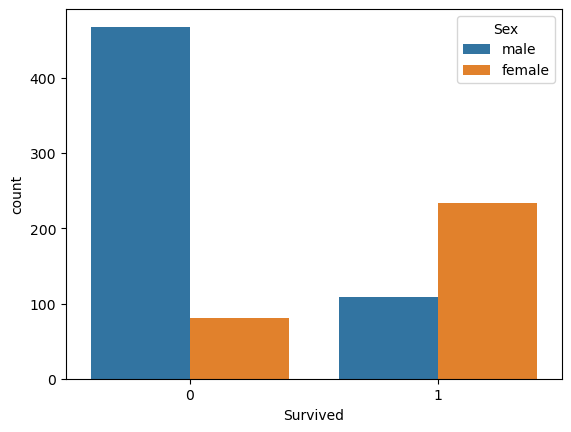

In [9]:
sns.countplot(x="Survived",hue="Sex",data=df)

In [10]:
pd.crosstab(df["Survived"],df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


<Axes: xlabel='Pclass', ylabel='Age'>

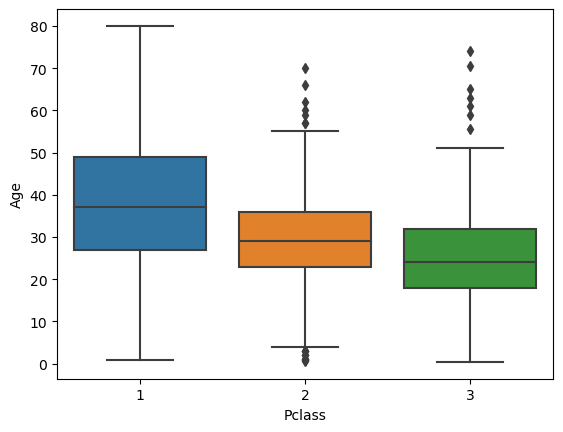

In [11]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [12]:
df=df.drop(["Cabin"],axis=1)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
df=df.dropna()

In [15]:
df.shape

(712, 11)

# Encoding

In [16]:
df=pd.get_dummies(columns=["Sex","Embarked","Pclass"],data=df)

In [17]:
df=df.drop(["PassengerId","Name","Ticket","Fare"],axis=1)

In [18]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

# Spliting Data

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# Logistic Regression

In [20]:
model_1=LogisticRegression()

In [21]:
model_1.fit(xtrain,ytrain)

LogisticRegression()

In [22]:
model_1.score(xtrain,ytrain)

0.8052208835341366

In [23]:
pred=model_1.predict(xtest)

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(ytest,pred)

0.780373831775701

<Axes: >

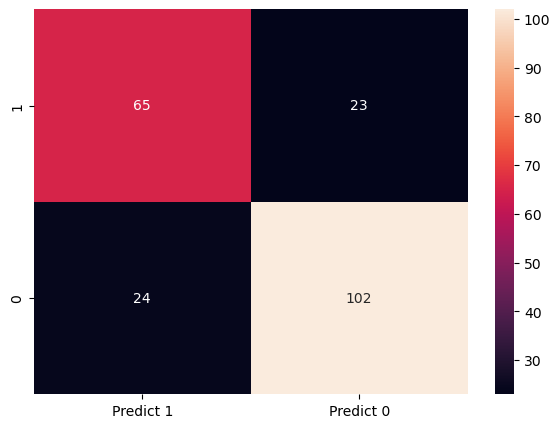

In [26]:
cm=metrics.confusion_matrix(ytest,pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier(max_depth=3)
model_2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [28]:
model_2.score(xtrain,ytrain)

0.8192771084337349

In [29]:
model_2.score(xtest,ytest)

0.7897196261682243

# Bagging Tree 

In [30]:
from sklearn.ensemble import BaggingClassifier
model_3=BaggingClassifier(n_estimators=90,base_estimator=model_2)
model_3.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=90)

In [31]:
model_3.score(xtrain,ytrain)

0.8373493975903614

In [32]:
model_3.score(xtest,ytest)

0.8177570093457944

# Ada Boosting

In [33]:
from sklearn.ensemble import AdaBoostClassifier
model_4=AdaBoostClassifier(n_estimators=27)
model_4.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=27)

In [34]:
model_4.score(xtrain,ytrain)

0.8393574297188755

In [35]:
model_4.score(xtest,ytest)

0.780373831775701

# Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
model_5=GradientBoostingClassifier(n_estimators=27)
model_5.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=27)

In [37]:
model_5.score(xtrain,ytrain)

0.8614457831325302

In [38]:
model_5.score(xtest,ytest)

0.7850467289719626

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_6=BaggingClassifier(n_estimators=50,max_features=5)
model_6.fit(xtrain,ytrain)

BaggingClassifier(max_features=5, n_estimators=50)

In [40]:
model_6.score(xtrain,ytrain)

0.9036144578313253

In [41]:
model_6.score(xtest,ytest)

0.780373831775701